In [2]:
from typing import TypedDict

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_jpy: float

In [4]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_jpy(state: PortfolioState) -> PortfolioState:
    state['total_jpy'] = state['total_usd'] * 146
    return state

In [5]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total_node", calc_total)
builder.add_node("convert_to_jpy_node", convert_to_jpy)

builder.add_edge(START, "calc_total_node")
builder.add_edge("calc_total_node", "convert_to_jpy_node")
builder.add_edge("convert_to_jpy_node", END)
graph = builder.compile()

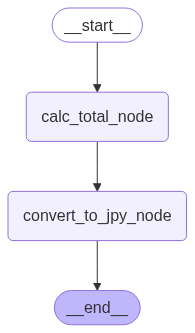

In [6]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [7]:
graph.invoke({"amount_usd": 1000})

{'amount_usd': 1000, 'total_usd': 1080.0, 'total_jpy': 157680.0}